# Automated hip joint cartilage generation <a class="tocSkip"> 
This notebook explains a method to automatically generate a hj geometry based on the bone geometries

# imports

In [1]:
import numpy as np
import meshplot as mp
from pathlib import Path
import sys
sys.path.append('../')
import os
import cargen

In [2]:
"""
DIRECTORIES:
"""
main_dir = Path('..')

# input and output paths
i_dir = main_dir / 'models'
o_dir = main_dir / 'output'

# Remove all files inside output directory if it exists, otherwise create it
if o_dir.is_dir():
    for file in o_dir.iterdir():
        if file.is_file():
            file.unlink()
else:
    o_dir.mkdir(exist_ok=False)

In [3]:
"""
VALUES:

i_dim, o_dim = input and output dimension ("mm" = millimeters, "m" = meters)
i_format = the format of the input surface mesh ( ".obj" , ".stl")
o_format = format you want the files to be save at ( ".obj" , ".stl")
+ scroll down to calibrate the cartilage generation parameters
"""
# dimensions 
i_dim  = "mm"     
o_dim  = "mm"

i_format = ".stl"
o_format = ".obj"

In [4]:
"""
NAMES & PATHS:
"""
# bones
lpelvis_name = 'lpelvis'
lfemur_name  = 'lfemur' 

# cartilages
lpelvic_name = 'lpelvic'
lfemoral_name = 'lfemoral'

#bones 
clean_lpelvis_name = 'clean_' + lpelvis_name + '_'+ o_dim
clean_lfemur_name  = 'clean_' + lfemur_name  + '_'+ o_dim

#cartilages
lpelvic_cart_name = lpelvic_name +'_cart_'+ o_dim
lpelvic_top_name  = lpelvic_name +'_top_' + o_dim

lfemoral_cart_name = lfemoral_name +'_cart_'+ o_dim
lfemoral_top_name  = lfemoral_name +'_top_' + o_dim

# input paths
lpelvis_path = str((i_dir/ lpelvis_name).with_suffix(i_format))
lfemur_path  = str((i_dir/ lfemur_name).with_suffix(i_format))

# output paths
#bones
clean_lpelvis_path = str((o_dir/ clean_lpelvis_name).with_suffix(o_format))
clean_lfemur_path  = str((o_dir/ clean_lfemur_name).with_suffix(o_format))

#cartilage
lpelvic_cart_path  = str((o_dir/ lpelvic_cart_name).with_suffix(o_format))
lpelvic_top_path   = str((o_dir/ lpelvic_top_name).with_suffix(o_format))

lfemoral_cart_path = str((o_dir/ lfemoral_cart_name).with_suffix(o_format))
lfemoral_top_path  = str((o_dir/ lfemoral_top_name).with_suffix(o_format))

# implementation

## read and clean up input

In [5]:
s1_vertices, s1_faces  = cargen.read_and_clean ( lpelvis_path, i_dim ) 
s2_vertices, s2_faces  = cargen.read_and_clean ( lfemur_path, i_dim )

number of triangles after cleaning 69466
number of triangles after cleaning 55600


In [6]:
frame = mp.plot( s1_vertices, s1_faces, c = cargen.bone, shading = cargen.sh_false )
frame.add_mesh ( s2_vertices, s2_faces, c = cargen.bone, shading = cargen.sh_false )

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-71.74111…

1

## left femoral cartilage

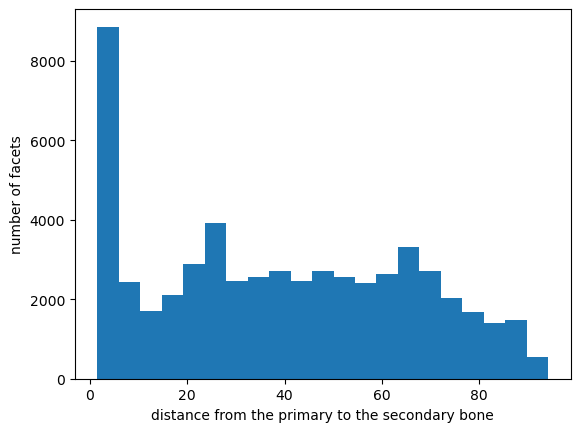

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-103.9878…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-103.9878…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-85.12970…

cartilage area is:  5890.81
mean cartilage thickness is:  0.84
maximum cartilage thickness is:  2.03


In [7]:
# set the parameters
param = cargen.Var()  

# make it
s2_cart_vertices, s2_cart_faces, s2c_top_vertices, s2c_top_faces,  = cargen.get_hj_cartilage ( s2_vertices, s2_faces, s1_vertices, s1_faces, param )

# reset the parameters to default values
param.reset()

## left pelvic cartilage

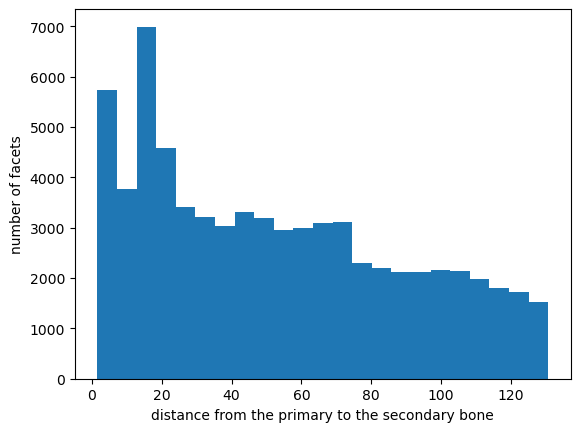

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-71.74111…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-71.74111…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-81.08628…

cartilage area is:  3122.03
mean cartilage thickness is:  0.99
maximum cartilage thickness is:  2.06


In [8]:
# set the parameters
param = cargen.Var()  
param.trimming_iteration = 2
param.extend_cartilage_flag   = False
param.curve_info              = False
param.no_extend_trimming_iteration = 2

# make it
s1_cart_vertices, s1_cart_faces, s1c_top_vertices, s1c_top_faces = cargen.get_hj_cartilage ( s1_vertices, s1_faces, s2_vertices, s2_faces, param ) 

# reset the parameters to default values
param.reset()

## remove cartilage-cartilage penetration and measure contact area 

In [9]:
s2_cart_vertices = cargen.remove_penetration(s2_cart_vertices, s1_cart_vertices, s1_cart_faces)
s2c_top_vertices = cargen.remove_penetration(s2c_top_vertices, s1c_top_vertices, s1c_top_faces)

cargen.contact_surface(s2c_top_vertices, s2c_top_faces, s1c_top_vertices, s1c_top_faces, 0.07 )

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-85.12970…

contact surface area is:  2017.01


## export results

### cartilages

In [10]:
cargen.save_surface ( s2_cart_vertices, s2_cart_faces, o_dim, lfemoral_cart_path )
cargen.save_surface ( s2c_top_vertices, s2c_top_faces, o_dim, lfemoral_top_path )
cargen.save_surface ( s1_cart_vertices, s1_cart_faces, o_dim, lpelvic_cart_path)
cargen.save_surface ( s1c_top_vertices, s1c_top_faces, o_dim, lpelvic_top_path)

### cleaned bones

In [11]:
cargen.save_surface ( s1_vertices, s1_faces, o_dim, clean_lpelvis_path )
cargen.save_surface ( s2_vertices, s2_faces, o_dim, clean_lfemur_path)

# voila!

In [12]:
frame = mp.plot ( s1_vertices, s1_faces, c = cargen.bone, shading = cargen.sh_false )
frame.add_mesh ( s2_vertices, s2_faces, c = cargen.bone, shading = cargen.sh_false )
frame.add_mesh ( s1c_top_vertices, s1c_top_faces, c = cargen.pastel_orange, shading = cargen.sh_true )
frame.add_mesh ( s2c_top_vertices, s2c_top_faces, c = cargen.pastel_orange, shading = cargen.sh_true )

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-71.74111…

3